In [1]:


library(tidyverse) # metapackage of all tidyverse packages

list.files(path = "../input")



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "airlines-booking-csv"

## Inspecting the dataset and EDA 

In [2]:
df<-read.csv('/kaggle/input/airlines-booking-csv/customer_booking.csv')
head(df)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<int>
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
5,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
6,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52,0


In [3]:
tail(df)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<int>
49995,2,Internet,RoundTrip,25,6,9,Sun,PERPNH,Australia,0,0,0,5.62,0
49996,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49997,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49998,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49999,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0
50000,1,Internet,RoundTrip,19,6,10,Thu,PERPNH,Australia,0,1,0,5.62,0


In [4]:
df%>%glimpse

Rows: 50,000
Columns: 14
$ num_passengers        <int> 2, 1, 2, 1, 2, 1, 3, 2, 1, 1, 2, 1, 4, 1, 1, 1, …
$ sales_channel         <chr> "Internet", "Internet", "Internet", "Internet", …
$ trip_type             <chr> "RoundTrip", "RoundTrip", "RoundTrip", "RoundTri…
$ purchase_lead         <int> 262, 112, 243, 96, 68, 3, 201, 238, 80, 378, 185…
$ length_of_stay        <int> 19, 20, 22, 31, 22, 48, 33, 19, 22, 30, 25, 43, …
$ flight_hour           <int> 7, 3, 17, 4, 15, 20, 6, 14, 4, 12, 14, 2, 19, 14…
$ flight_day            <chr> "Sat", "Sat", "Wed", "Sat", "Wed", "Thu", "Thu",…
$ route                 <chr> "AKLDEL", "AKLDEL", "AKLDEL", "AKLDEL", "AKLDEL"…
$ booking_origin        <chr> "New Zealand", "New Zealand", "India", "New Zeal…
$ wants_extra_baggage   <int> 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, …
$ wants_preferred_seat  <int> 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, …
$ wants_in_flight_meals <int> 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, …
$ flight_durati

In [5]:
# Checking for missing values
any(is.na(df))

[1] FALSE

In [6]:
sum(is.na(df))

[1] 0

In [7]:
distinct(df)

num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<int>
2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
3,Internet,RoundTrip,201,33,6,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
2,Internet,RoundTrip,238,19,14,Mon,AKLDEL,India,1,0,1,5.52,0
1,Internet,RoundTrip,80,22,4,Mon,AKLDEL,New Zealand,0,0,1,5.52,0


In [8]:
df[!duplicated(df),]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<int>
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
5,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
6,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
7,3,Internet,RoundTrip,201,33,6,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
8,2,Internet,RoundTrip,238,19,14,Mon,AKLDEL,India,1,0,1,5.52,0
9,1,Internet,RoundTrip,80,22,4,Mon,AKLDEL,New Zealand,0,0,1,5.52,0


In [9]:
# Counting the number of Rows
count(unique(df))

n
<int>
49281


In [10]:
df%>%select(booking_origin,flight_duration)%>%
head()

,booking_origin,flight_duration
,<chr>,<dbl>
1,New Zealand,5.52
2,New Zealand,5.52
3,India,5.52
4,New Zealand,5.52
5,India,5.52
6,New Zealand,5.52


In [11]:
library("ggplot2")

In [12]:
df%>%group_by(trip_type)%>%
summarize(passengers=sum(num_passengers))

trip_type,passengers
<chr>,<int>
CircleTrip,182
OneWay,606
RoundTrip,78774


In [13]:
library(plotly)
library(ggplot2)


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


The following object is masked from ‘package:httr’:

    config




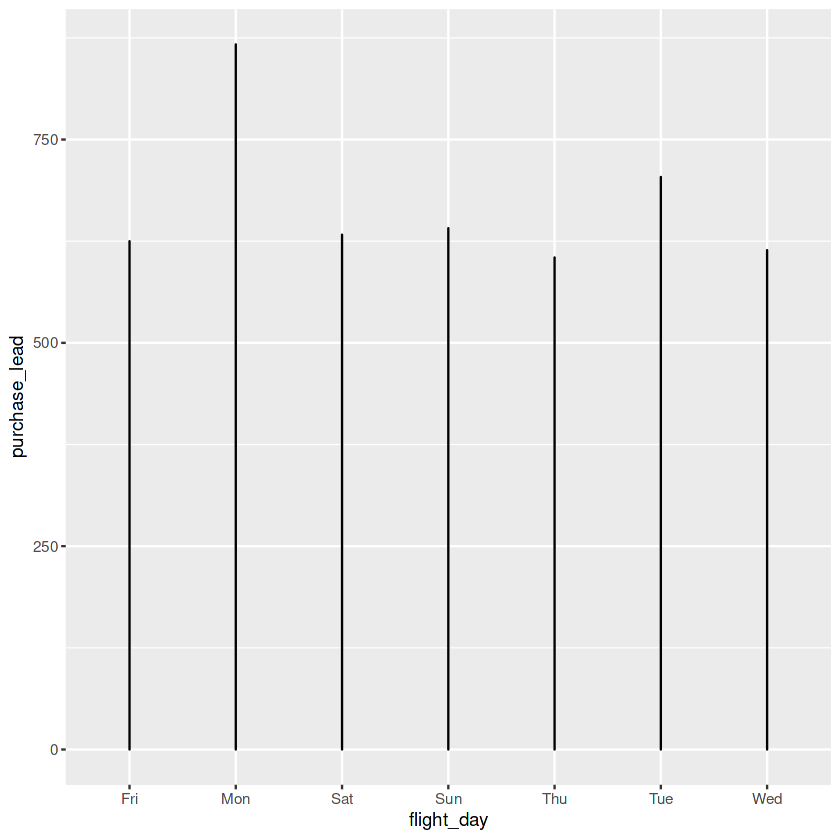

In [14]:
ggplot(data=df)+geom_line(mapping=aes(x=flight_day,y=purchase_lead))

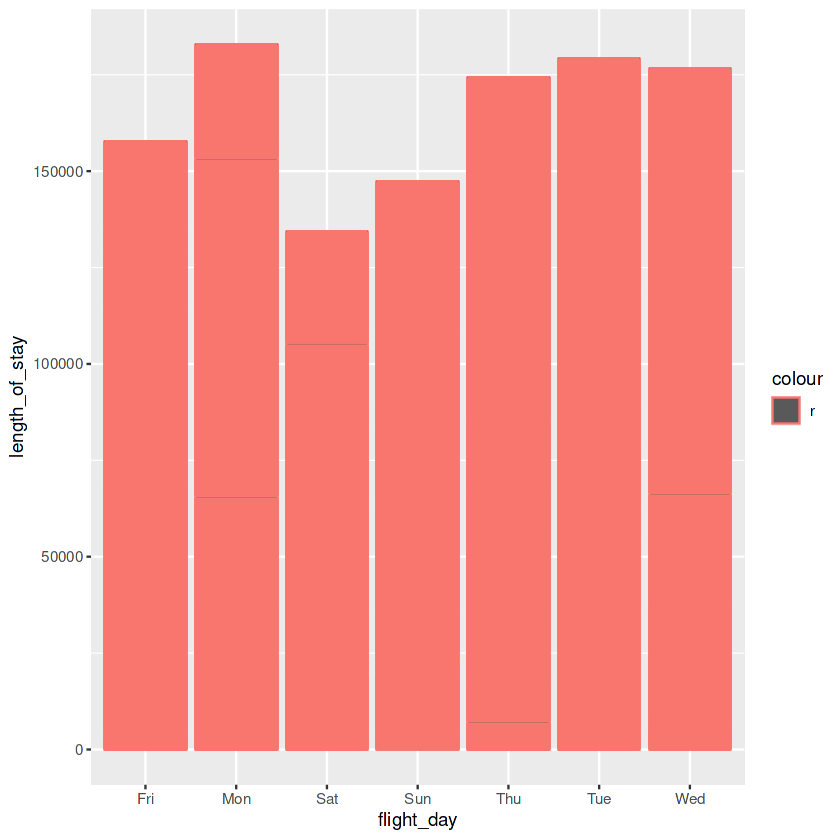

In [15]:
ggplot(data=df)+geom_col(mapping=aes(x=flight_day,y=length_of_stay,color='r'))

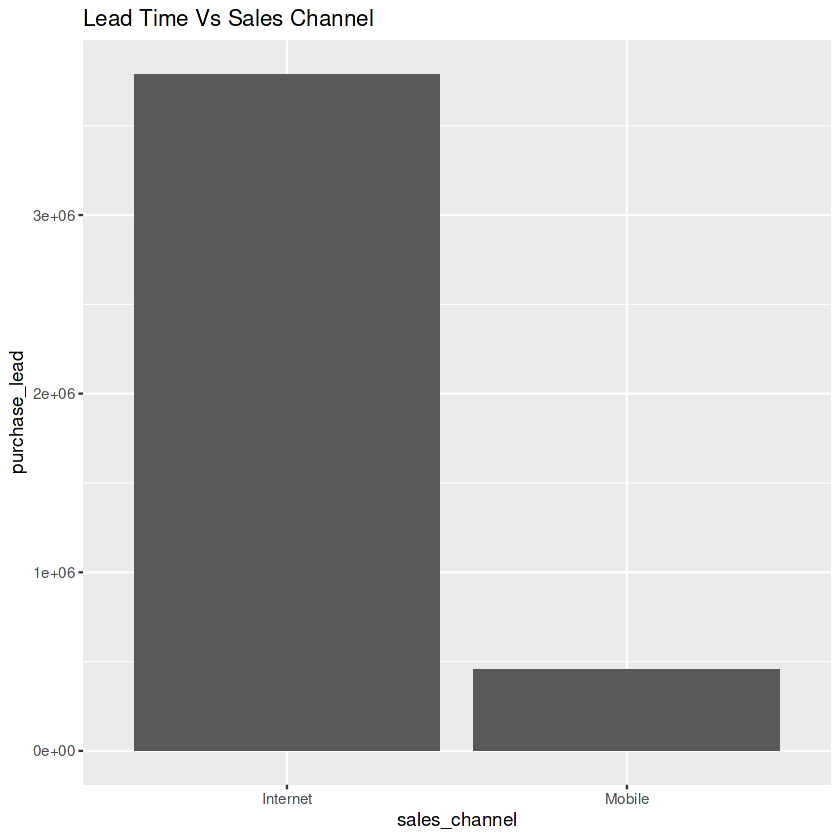

In [16]:
ggplot(data=df)+geom_col(mapping=aes(x=sales_channel,y=purchase_lead))+labs(title='Lead Time Vs Sales Channel')

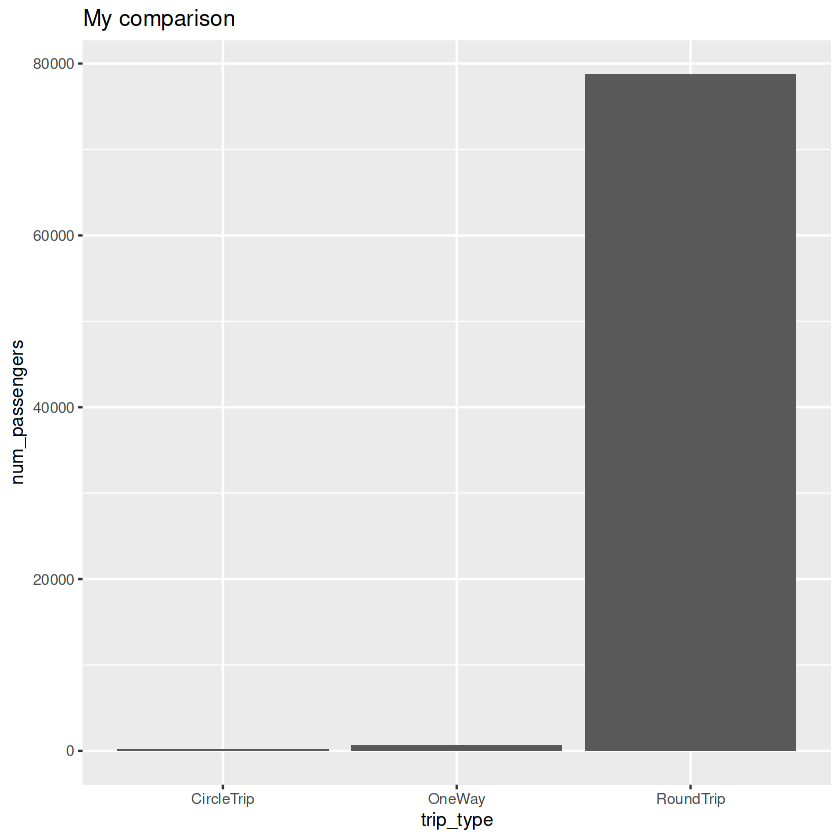

In [17]:
ggplot(data=df)+geom_col(mapping=aes(x=trip_type,y=num_passengers))+labs(title='My comparison')